In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the dataset
crime_data = pd.read_csv('/Users/yeshwanthsatyadev/Desktop/crime_data.csv')

In [3]:
# Display the first few rows of the dataset
print(crime_data.head())

# Select relevant features for clustering
X = crime_data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


In [4]:
# Hierarchical Clustering
# Using AgglomerativeClustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_labels = agg_cluster.fit_predict(X)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [5]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=20, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

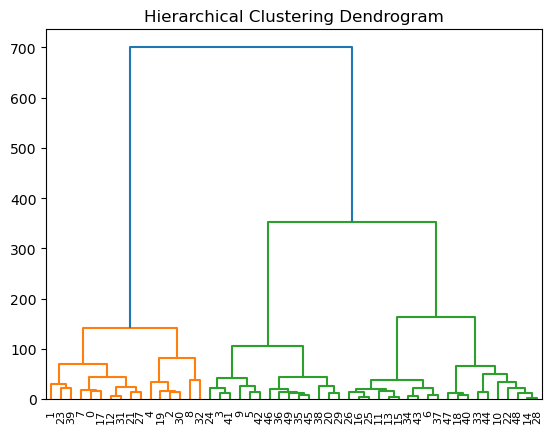

In [7]:
# Visualize Hierarchical Clustering Dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

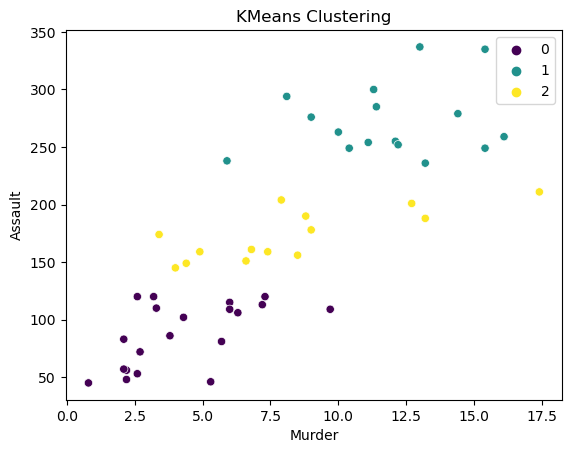

In [8]:
# Visualize KMeans Clustering
sns.scatterplot(x='Murder', y='Assault', hue=kmeans_labels, data=crime_data, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

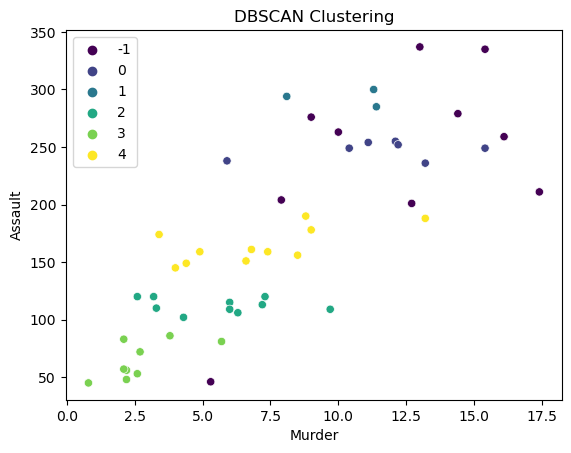

In [9]:
# Visualize DBSCAN Clustering
sns.scatterplot(x='Murder', y='Assault', hue=dbscan_labels, data=crime_data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [10]:
# Print cluster counts for each method
print(f'Hierarchical Clusters: {np.unique(agg_labels)}')
print(f'KMeans Clusters: {np.unique(kmeans_labels)}')
print(f'DBSCAN Clusters: {np.unique(dbscan_labels)}')

Hierarchical Clusters: [0 1 2]
KMeans Clusters: [0 1 2]
DBSCAN Clusters: [-1  0  1  2  3  4]
